<a href="https://colab.research.google.com/github/OmkarKotwalProject/Pizza-Hut-Work/blob/main/Pizza_Hut_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries and loading the dataset

In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
!pip install pyspellchecker
!pip install Counter

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

     |████████████████████████████████| 2.7 MB 5.4 MB/s 
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=1c4ea646eac5d8d1152d1711b52838d1d1dd7a5bf9769b2ef5e6011d08c2efe9
  Stored in directory: /root/.cache/pip/wheels/f9/15/75/7a0462a00beb08e391f5da370ca409b56781d2501dba083fa3
Successfully built Counter
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [5]:
cd /content/drive/MyDrive/CUSTOMER_REVIEWS/ScrapedReviews/PROJECT SCRAPED REVIEWS/Pizza Hut Reviews_3k/

/content/drive/MyDrive/CUSTOMER_REVIEWS/ScrapedReviews/PROJECT SCRAPED REVIEWS/Pizza Hut Reviews_3k


In [6]:
df = pd.read_excel('All_Reviews_PH.xlsx')

In [7]:
#Keeping the original as it is.
df_review=df  

THIS IS A BACKUP LOAD OF ORIGINAL DATAFRAME, ONLY USE IF something goes wrong and need to load the dataset again.

In [8]:
# #FOR EMPTYING THE DATAFRAME
#df_review.drop(columns=['Review','Sentiment'],inplace=True)

In [9]:
# #FOR RELOADING WITH ORIGINAL RAW DATA
# df= pd.read_excel(io.BytesIO(uploaded['All_Reviews_PH.xlsx']))
# df_review=df

BACKUP CODE END

In [10]:
df_review['Sentiment']=df_review['Sentiment'].astype(int)

In [11]:
print(df_review.head())
print(df_review.shape)

                                                                                                                                                                                      Review  \
0                                                                                                                                                                            tasteless pizza   
1                                                                                                                                                                           price is so high   
2  very very disappointed ? ? ? ? \nwhile ordering you didn't mentioned it is small.. you guys are f**king fooling us .... 400rs spent for 200rs pizza.... isse acha grand deke kamaho bc Mc   
3                                                                                                                                                               taste was not up to the mark   
4                      Open pizza box an

HOW MANY POSITIVE REVIEWS, HOW MANY NEGATIVE REVIEWS

In [12]:
print("Negative reviews: ",len(df_review[df_review['Sentiment']==0]))
print("Positive reviews: ",len(df_review[df_review['Sentiment']==1]))

Negative reviews:  928
Positive reviews:  1972


In [13]:
print("The number of samples in the dataset!")
pos_percent=(len(df_review[df_review['Sentiment']==1])/len(df_review)*100)
print("Positive reviews: ",round(pos_percent,2),"%")
print("Negative reviews: ",len(df_review[df_review['Sentiment']==0]))
neg_percent=(len(df_review[df_review['Sentiment']==0])/len(df_review)*100)
print("Negative reviews: ",round(neg_percent,2),"%")

The number of samples in the dataset!
Positive reviews:  68.0 %
Negative reviews:  928
Negative reviews:  32.0 %


In [14]:
#Checking if any null values
df_review[df_review.isna().any(axis=1)]

,Review,Sentiment


# PRE-PROCESSING THE DATA

1. Removing digits [\d]

In [15]:
#REMOVING NUMBERS 
df_review['Review']=df_review['Review'].replace('\d+','',regex=True)

2. Replacing special characters by empty space ‘ ‘ and dealing with any character that occurs more than twice: yummmmy => yummy

In [16]:
df_review['Review']=df_review['Review'].replace('\n', ' ',regex=True)
df_review['Review']=df_review['Review'].replace(('[^!|^.|^,|^;|^-|^@|^\w\s]'),"", regex = True)
for i in range(len(df_review)):
  sentence=df_review['Review'][i]
  sentence=sentence.replace('.', ' ')
  sentence=sentence.replace(',', ' ')
  sentence=sentence.replace('!', ' ')
  sentence=sentence.replace('.', ' ')
  sentence=sentence.replace(';', ' ')
  sentence=sentence.replace('-', ' ')
  sentence=sentence.replace('@', ' ')
  sentence=sentence.replace(')', ' ')
  sentence=sentence.replace('(', ' ')
  sentence=sentence.replace('{', ' ')
  sentence=sentence.replace('}', ' ')

  sentence=re.sub(r'(.)\1+', r'\1\1',sentence)   # yummmyyy => yummyy,  '     '=>'  '  #This line will remove char which occures more than 2 times consecutively.
  df_review['Review'][i]=sentence

print(df_review.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                                                                                                                                                  Review  \
0                                                                                                                                                        tasteless pizza   
1                                                                                                                                                       price is so high   
2        very very disappointed  while ordering you didnt mentioned it is small  you guys are fking fooling us  rs spent for rs pizza  isse acha grand deke kamaho bc Mc   
3                                                                                                                                           taste was not up to the mark   
4  Open pizza box and open Jalapeño Poppers  Sealing Tape not properly put  No point in blaming poor delivery person  Highly disappointing  

In [17]:
print(df_review.head())
print(df_review.tail())

                                                                                                                                                                  Review  \
0                                                                                                                                                        tasteless pizza   
1                                                                                                                                                       price is so high   
2        very very disappointed  while ordering you didnt mentioned it is small  you guys are fking fooling us  rs spent for rs pizza  isse acha grand deke kamaho bc Mc   
3                                                                                                                                           taste was not up to the mark   
4  Open pizza box and open Jalapeño Poppers  Sealing Tape not properly put  No point in blaming poor delivery person  Highly disappointing  

3. REMOVING CHARACTERS WHICH ONLY OCCUR ONCE! ALSO REPLACING TWO CONSECUTIVE SPACES BY ONE

In [18]:
cnter=0
while(cnter<2):
  for i in range(len(df_review)):
    new_sentence=" "
    sentence=df_review['Review'][i]    #get the row i.e. sentence
    words=sentence.split()  #makes a list of the words in the sentence
    for word in words:      #check every words length and if it is less than 2, remove it
      if len(word)<2:
        words.remove(word)
    new_sentence=new_sentence.join(words) #Create a new sentence by joining all the words in the list with " " as a separator
    df_review['Review'][i]=new_sentence   #replace current row i.e. sentence by the new sentence
  cnter=cnter+1
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
print(df_review.head(5))

                                                                                                                                                             Review  \
0                                                                                                                                                   tasteless pizza   
1                                                                                                                                                  price is so high   
2       very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza isse acha grand deke kamaho bc Mc   
3                                                                                                                                      taste was not up to the mark   
4  Open pizza box and open Jalapeño Poppers Sealing Tape not properly put No point in blaming poor delivery person Highly disappointing not expected from Pizza Hut  

4.FINDING MISSPELLED WORDS AND CORRECTING THEM!
Algorithm used for correcting words:

    Create a list of misspelled words found in the dataset.
    Create a list of correctly spelled words found in the dataset.
    Use similar() function of 'SequenceMatcher' for finding similarity between words from both lists. If it is greater than 0.8, create a dictionary (dict['misspelled word'=correctly spelled word).
    Now traverse the dataset, while checking a row, extract its misspelled words, check if misspelled word is in the dictionary, if it is then replace it with correctly spelled word.

In [20]:
#This creates a list of sets of misspelled words found in each row.
from spellchecker import SpellChecker
spell=SpellChecker()
mis_list=[]
for i in range(len(df_review)):
  sentence=df_review['Review'][i].split()
  mis_sent=spell.unknown(sentence)
  mis_list.append(mis_sent)
  if set() in mis_list:
    mis_list.remove(set())
print("first 50 row's Misspelled words but they are in [{misspelled words list from row 1},{misspelled words list from row 2}]: ",mis_list[0:50])

first 50 row's Misspelled words but they are in [{misspelled words list from row 1},{misspelled words list from row 2}]:  [{'rs', 'bc', 'kamaho', 'isse', 'fking', 'mc'}, {'jalapeño'}, {'totallybwaste'}, {'oreganos'}, {'rs'}, {'compair', 'rs', 'pizaa'}, {'orgeno'}, {'uae', 'kababs'}, {'orderit'}, {'rd'}, {'zomato'}, {'chease', 'thanda'}, {'coustomer'}, {'zomato'}, {'ppl'}, {'xtra'}, {'origano'}, {'jst'}, {'zomato'}, {'whatsoeververy'}, {'coveredsecured'}, {'zomato', 'aftr'}, {'pls', 'rply'}, {'didntike'}, {'cheeze'}, {'wt'}, {'zomato'}, {'breadstix'}, {'recieve'}, {'rs'}, {'deshelved'}, {'pls'}, {'thanda'}, {'rs', 'bkc'}, {'contactless'}, {'whrn'}, {'rs'}, {'pls'}, {'detoraited'}, {'itoms'}, {'transperant', 'whyy'}, {'kabab'}, {'khatta', 'hogaya', 'lagta', 'kharab', 'aisa', 'seekh', 'kabab'}, {'pcs'}, {'pls', 'pm'}, {'servise'}, {'mazing'}, {'zomato', 'owsume'}, {'andngarlik', 'cheezy'}, {'incomplets'}]


In [21]:
#Creating a list of misspelled words. (Basically extracting each set element from the mis_list and putting it into mis_mis_list)

from collections import Counter
mis_mis_list=[]
for i in mis_list:
  for j in i:
    mis_mis_list.append(j.lower())   #just making the words lower before appending to mis_mis_list

print("first 50 Misspelled words:",mis_mis_list[0:50]) #LIST OF MISSPELLED WORDS   
print("Total misspelled words: ",len(mis_mis_list)) #Note: this list is not a 'unique mispelled words' list, it has repeated occurences of them.


#Finding common words and their occurrences in the mis_mis_list #Just a trial code for common words finder.
cnt=Counter(mis_mis_list)
cmmn=cnt.most_common(100)   
print(cmmn)

first 50 Misspelled words: ['rs', 'bc', 'kamaho', 'isse', 'fking', 'mc', 'jalapeño', 'totallybwaste', 'oreganos', 'rs', 'compair', 'rs', 'pizaa', 'orgeno', 'uae', 'kababs', 'orderit', 'rd', 'zomato', 'chease', 'thanda', 'coustomer', 'zomato', 'ppl', 'xtra', 'origano', 'jst', 'zomato', 'whatsoeververy', 'coveredsecured', 'zomato', 'aftr', 'pls', 'rply', 'didntike', 'cheeze', 'wt', 'zomato', 'breadstix', 'recieve', 'rs', 'deshelved', 'pls', 'thanda', 'rs', 'bkc', 'contactless', 'whrn', 'rs', 'pls']
Total misspelled words:  2296
[('bkc', 149), ('cst', 101), ('rs', 47), ('zomato', 46), ('bandra', 41), ('kishore', 35), ('kurla', 34), ('pizzahut', 31), ('mr', 31), ('thanku', 30), ('exotica', 28), ('kishor', 24), ('nonveg', 20), ('shubhangi', 19), ('pm', 17), ('nd', 17), ('yumm', 16), ('pls', 14), ('pizzaa', 13), ('plz', 12), ('frnds', 12), ('bt', 11), ('ppl', 10), ('cheezy', 10), ('panner', 10), ('st', 10), ('vegorama', 9), ('ph', 9), ('grt', 9), ('th', 9), ('bcoz', 9), ('afternoon', 8), ('h

In [22]:
#REMOVING NAMES FROM THE LIST of misspelled words
names_list=['bkc','cst','zomato','pizzahut','bandra','kurla','kishor','kishore','nonveg','pm','shubhangi','afternoon','vegorama','birizza','covid','jain','dinin','chana','shravani','touheed']
for name in names_list:
  for j in range(len(mis_mis_list)):
    if name in mis_mis_list:
      mis_mis_list.remove(name)
print("Final Misspelled words list after removing names: (Showing only first 50) ",mis_mis_list[0:50]) #This is the list of misseplled words!



#Trial code for common words finder, again.
cnt=Counter(mis_mis_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)    


Final Misspelled words list after removing names: (Showing only first 50)  ['rs', 'bc', 'kamaho', 'isse', 'fking', 'mc', 'jalapeño', 'totallybwaste', 'oreganos', 'rs', 'compair', 'rs', 'pizaa', 'orgeno', 'uae', 'kababs', 'orderit', 'rd', 'chease', 'thanda', 'coustomer', 'ppl', 'xtra', 'origano', 'jst', 'whatsoeververy', 'coveredsecured', 'aftr', 'pls', 'rply', 'didntike', 'cheeze', 'wt', 'breadstix', 'recieve', 'rs', 'deshelved', 'pls', 'thanda', 'rs', 'contactless', 'whrn', 'rs', 'pls', 'detoraited', 'itoms', 'transperant', 'whyy', 'kabab', 'khatta']
[('rs', 47), ('mr', 31), ('thanku', 30), ('exotica', 28), ('nd', 17), ('yumm', 16), ('pls', 14), ('pizzaa', 13), ('plz', 12), ('frnds', 12), ('bt', 11), ('ppl', 10), ('cheezy', 10), ('panner', 10), ('st', 10), ('ph', 9), ('grt', 9), ('th', 9), ('bcoz', 9), ('hygenic', 7), ('varities', 7), ('hr', 7), ('pizaa', 6), ('rd', 6), ('origano', 6), ('jst', 6), ('cheeze', 6), ('kabab', 6), ('nyc', 6), ('awsm', 6), ('gr', 6), ('vist', 5), ('vfm', 5)

Finding a list of correctly spelled words!

In [23]:
#first, just creating a list of words found in the dataset
correct_word_list=[]
for i in range(len(df_review)):
  sentence=df_review['Review'][i]
  words=sentence.split()
  for word in words:
    correct_word_list.append(word.lower())
print(correct_word_list[0:50])


  

['tasteless', 'pizza', 'price', 'is', 'so', 'high', 'very', 'very', 'disappointed', 'while', 'ordering', 'you', 'didnt', 'mentioned', 'it', 'is', 'small', 'you', 'guys', 'are', 'fking', 'fooling', 'us', 'rs', 'spent', 'for', 'rs', 'pizza', 'isse', 'acha', 'grand', 'deke', 'kamaho', 'bc', 'mc', 'taste', 'was', 'not', 'up', 'to', 'the', 'mark', 'open', 'pizza', 'box', 'and', 'open', 'jalapeño', 'poppers', 'sealing']


In [24]:
#We have to make both lists mis_mis_list and correct_words_list contain unique words, not repeated words or 'remove' won't work!
print("total of all words of misspelled word list:",len(mis_mis_list))
print("total of all words of correct word list+misspelled word list:",len(correct_word_list))
mis_mis_list=list(set(mis_mis_list))
correct_word_list=list(set(correct_word_list))
print("total of unique words of misspelled word list:",len(mis_mis_list))
print("total of unique words of correct word list+missplled word list:",len(correct_word_list))
print("total of unique words of names list:",len(names_list))

total of all words of misspelled word list: 1735
total of all words of correct word list+misspelled word list: 104203
total of unique words of misspelled word list: 1102
total of unique words of correct word list+missplled word list: 5778
total of unique words of names list: 20


In [25]:
print("correct word list length before removing misspelled words and names:",len(correct_word_list))
names_list=['bkc','cst','zomato','pizzahut','bandra','kurla','kishor','kishore','nonveg','pm','shubhangi','afternoon','vegorama','birizza','covid','jain','dinin','chana','shravani','touheed']
cnt=0
#Removing misspelled words from correct_word_list, found in mis_mis_list
for w in mis_mis_list:
  if w in correct_word_list:
    correct_word_list.remove(w)

#Removing names from correct_word_list, found in names_list
for n in names_list:
  if n in correct_word_list:
    correct_word_list.remove(n) 
print("correct word list length after removing misspelled words and names:",len(correct_word_list))

correct word list length before removing misspelled words and names: 5778
correct word list length after removing misspelled words and names: 4657


In [26]:
#Checking similarity between words from correct_word_list and mis_mis_list, if its more than 0.8, 
#do dictionary[misspelled word]=correct word
#TAKES 1 MINUTE+
from difflib import SequenceMatcher       #Library used for checking similarity

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()    #Function to check similarity!

dictionary={}
cnt=0
for cor_word in correct_word_list:
  for mis_word in mis_mis_list:
    ratio=similar(cor_word,mis_word)
    if(ratio>0.8):
      cnt=cnt+1
      dictionary[mis_word]=cor_word
      #print("Correct word:",cor_word,"    misspelled word:",mis_word,"      Ratio:",ratio)
print("This many words can be corrected: ",cnt)

This many words can be corrected:  922


In [27]:
#Replacing the misspelled words with correct words
#Takes almost 10 seconds
words_corrected_cnt=0
for i in range(len(df_review)):
  sentence=(df_review['Review'][i]).lower()
  
  misspelled_words=spell.unknown(sentence.split())
  #print("list:",misspelled_words)
  for misword in misspelled_words:
    if misword in dictionary:
      correct_word=dictionary[misword]
      print("before:",sentence)
      print("misspelled word: ",misword,"     ","correct word:",correct_word)
      print("After:",sentence)
      sentence=sentence.replace(misword,correct_word)
      words_corrected_cnt=words_corrected_cnt+1
  df_review['Review'][i]=sentence
  

before: very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza isse acha grand deke kamaho bc mc
misspelled word:  isse       correct word: issue
After: very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza isse acha grand deke kamaho bc mc
before: very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza issue acha grand deke kamaho bc mc
misspelled word:  fking       correct word: king
After: very very disappointed while ordering you didnt mentioned it is small you guys are fking fooling us rs spent for rs pizza issue acha grand deke kamaho bc mc
before: open pizza box and open jalapeño poppers sealing tape not properly put no point in blaming poor delivery person highly disappointing not expected from pizza hut
misspelled word:  jalapeño       correct word: jalapenos
After: open pizza bo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 dnt even wnt to give star but had no option pathetic and tasteless pizza have ever had it was my bday my sister got pizzas it was takeaway for around at home and they were the worst pizzas hve ever seen there was no filling of cheese vegetables and the base was so hard one couldnt eat at all couldnt take proper picture but hve one you can see how worthless the pizza is spoiled my bday extremely dissapointed
misspelled word:  bday       correct word: day
After: dnt even wnt to give star but had no option pathetic and tasteless pizza have ever had it was my bday my sister got pizzas it was takeaway for around at home and they were the worst pizzas hve ever seen there was no filling of cheese vegetables and the base was so hard one couldnt eat at all couldnt take proper picture but hve one you can see how worthless the pizza is spoiled my bday extremely dissapointed
before: dnt even wnt to give star but had no option pathetic and tasteless pizza have ever had it was my day my sister got 

In [28]:
#This many words were corrected and replaced
print(words_corrected_cnt)

865


5. Removing Stopwords

In [29]:
from nltk.corpus import stopwords
sw=stopwords.words("english")
print(sw)
#Removing the words below from the stopword list as they do impact the outcome when doing sentiment analysis. 
sw.append('would')
words=['no','not']
sw.remove('not')
sw.remove('no')
sw.remove('don\'t')
sw.remove('didn\'t')
sw.remove('wouldn\'t')
sw.remove('wouldn')
sw.remove('won\'t')
sw.remove('didn')
sw.remove('don')
sw.remove('isn\'t')
sw.remove('isn')
sw.remove('couldn\'t')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Making 'Review' lower so I can remove stopwords

In [30]:
df_review['Review']=df_review['Review'].str.lower()

In [31]:
df_review['Review']=df_review['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))
print(df_review.head())

                                                                                                                                                  Review  \
0                                                                                                                                        tasteless pizza   
1                                                                                                                                             price high   
2                                  disappointed ordering didnt mentioned small guys king fooling us rs spent rs pizza issue acha grand deke kamaho bc mc   
3                                                                                                                                         taste not mark   
4  open pizza box open jalapenos poppers sealing tape not properly put no point blaming poor delivery person highly disappointing not expected pizza hut   

   Sentiment  
0          0  
1          0  
2          0  
3  

In [32]:
#TOTAL WORDS AFTER REMOVING STOP WORDS!
p_list=[]
for i in range(2900):
  ent=df_review['Review'][i].split()
  p_list.append(ent)

word_list=[]
for element in p_list:
  for word in element:
    word_list.append(word)
print(len(word_list))

62148


Exploratory Data Analysis

For positive reviews

In [33]:
pos_reviews_list=[]
for rev in df_review[df_review['Sentiment']==1].Review:
  sent_list=rev.split()
  for w in sent_list:
    pos_reviews_list.append(w)


#Trial code for common words finder, again.
cnt=Counter(pos_reviews_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)

[('pizza', 2483), ('good', 1651), ('service', 1049), ('hut', 947), ('place', 827), ('food', 783), ('pizzas', 643), ('great', 604), ('nice', 498), ('staff', 431), ('time', 397), ('really', 390), ('also', 380), ('garlic', 359), ('amazing', 351), ('visit', 334), ('bread', 329), ('cheese', 327), ('chicken', 326), ('best', 320), ('awesome', 312), ('love', 302), ('ambience', 291), ('taste', 284), ('friends', 269), ('delicious', 266), ('one', 258), ('outlet', 242), ('like', 215), ('tasty', 208), ('ordered', 203), ('experience', 198), ('always', 192), ('not', 191), ('quality', 182), ('come', 177), ('order', 161), ('well', 161), ('try', 160), ('loved', 150), ('yummy', 147), ('friendly', 147), ('much', 143), ('quick', 142), ('meal', 142), ('must', 139), ('bkc', 139), ('offer', 133), ('veg', 132), ('excellent', 128), ('crust', 126), ('cheesy', 120), ('enjoyed', 118), ('get', 117), ('thank', 116), ('family', 114), ('paneer', 113), ('thanks', 107), ('us', 106), ('overall', 105), ('pan', 105), ('off

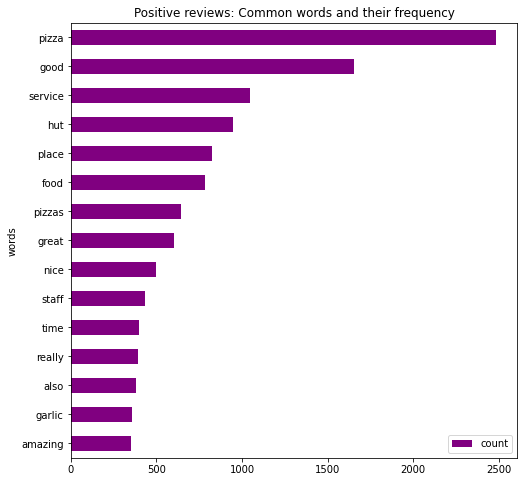

In [34]:
#cnt=Counter(df_review[df_review['Sentiment']==1].Review)
cnt=Counter(pos_reviews_list)
pos_common_words=pd.DataFrame(cnt.most_common(15), columns=['words','count'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Positive reviews: Common words and their frequency")
plt.show()

In [35]:
#Creating bi-grams
bigram_measures=nltk.collocations.BigramAssocMeasures()

finder=nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df_review[df_review['Sentiment']==1].Review])

In [36]:
finder.apply_freq_filter(25)
bigram_scores=finder.score_ngrams(bigram_measures.pmi)
#print('_'.join(bigram_scores[0][0]))
print(len(bigram_scores))

106


In [37]:
bigram_scores[0][0]
cnt_list=[]
for gram in bigram_scores:
  x = '_'.join(gram[0])
  cnt_list.append((x,gram[1]))
print(cnt_list[0:10])

[('petrol_pump', 10.281456430328932), ('kurla_complex', 10.139437425456501), ('bandra_kurla', 9.811277376857625), ('mouth_watering', 9.664652463139142), ('masala_lemonade', 9.522247762490887), ('potato_wedges', 9.412842368359868), ('value_money', 8.960064512406566), ('non_veg', 8.160791303416888), ('tandoori_paneer', 8.01955098993187), ('thankyou_much', 7.795335832988602)]


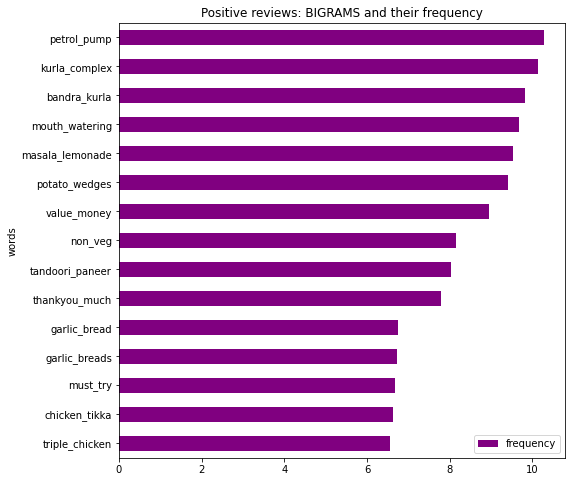

In [38]:
#cnt=Counter(df_review[df_review['Sentiment']==0].Review)
cnt=Counter(cnt_list)
pos_common_words=pd.DataFrame(cnt_list[0:15], columns=['words','frequency'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='frequency').plot.barh(x='words',y='frequency',ax=ax,color='purple')
ax.set_title("Positive reviews: BIGRAMS and their frequency")
plt.show()

For Negative Reviews

In [39]:
neg_reviews_list=[]
for rev in df_review[df_review['Sentiment']==0].Review:
  sent_list=rev.split()
  for w in sent_list:
    neg_reviews_list.append(w)


#Trial code for common words finder, again.
cnt=Counter(neg_reviews_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)

[('pizza', 1010), ('not', 527), ('hut', 309), ('order', 287), ('no', 271), ('cheese', 231), ('service', 220), ('bread', 210), ('food', 197), ('garlic', 168), ('ordered', 164), ('even', 155), ('good', 152), ('cold', 148), ('time', 145), ('like', 137), ('taste', 136), ('bad', 129), ('pizzas', 129), ('place', 123), ('worst', 119), ('delivery', 116), ('experience', 109), ('staff', 108), ('also', 106), ('one', 101), ('outlet', 98), ('money', 92), ('quality', 92), ('chicken', 89), ('didnt', 86), ('ever', 86), ('toppings', 85), ('dont', 85), ('never', 83), ('us', 81), ('pathetic', 80), ('really', 74), ('get', 70), ('disappointed', 69), ('take', 63), ('got', 58), ('mins', 57), ('served', 57), ('delivered', 52), ('better', 51), ('small', 50), ('less', 50), ('please', 49), ('veg', 49), ('took', 49), ('back', 48), ('restaurant', 48), ('call', 48), ('zomato', 47), ('size', 46), ('received', 46), ('worth', 45), ('much', 45), ('horrible', 44), ('waste', 44), ('customers', 44), ('minutes', 44), ('pan

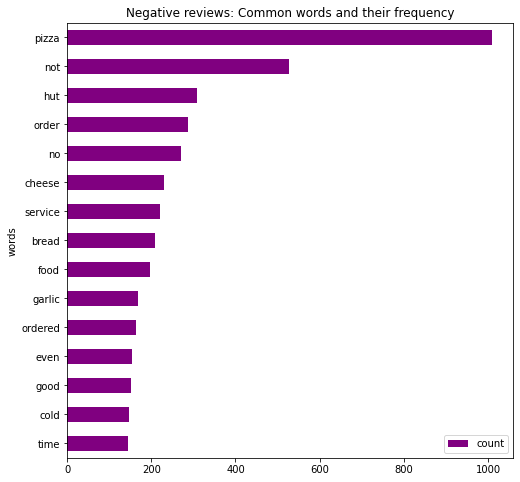

In [40]:
#cnt=Counter(df_review[df_review['Sentiment']==0].Review)
cnt=Counter(neg_reviews_list)
pos_common_words=pd.DataFrame(cnt.most_common(15), columns=['words','count'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Negative reviews: Common words and their frequency")
plt.show()

In [41]:
#Creating bi-grams
bigram_measures=nltk.collocations.BigramAssocMeasures()

finder=nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df_review[df_review['Sentiment']==0].Review])

In [42]:
finder.apply_freq_filter(25)
bigram_scores=finder.score_ngrams(bigram_measures.pmi)
#print('_'.join(bigram_scores[0][0]))
print(len(bigram_scores))

11


In [43]:
bigram_scores[0][0]
cnt_list=[]
for gram in bigram_scores:
  x = '_'.join(gram[0])
  cnt_list.append((x,gram[1]))
print(cnt_list[0:10])

[('waste_money', 7.377171942528543), ('garlic_bread', 6.22142217102882), ('bad_experience', 5.537685215130788), ('not_worth', 4.597171423133197), ('pizza_hut', 4.264274053901932), ('not_good', 3.3406680155097987), ('no_cheese', 2.982660782977309), ('not_even', 2.5987753088357834), ('worst_pizza', 2.5676703364677245), ('pizza_cold', 1.8379972348678777)]


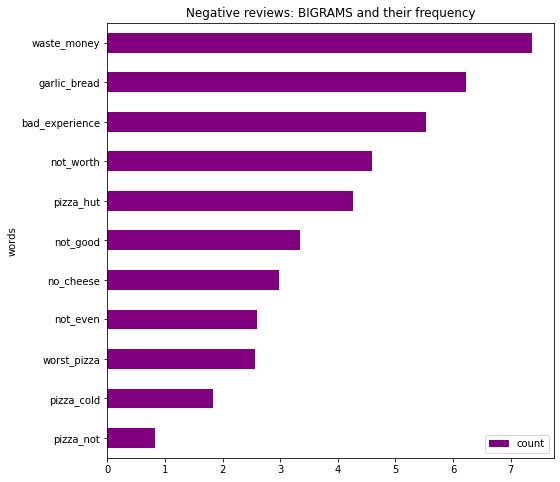

In [44]:
#cnt=Counter(df_review[df_review['Sentiment']==0].Review)
cnt=Counter(cnt_list)
pos_common_words=pd.DataFrame(cnt_list[0:15], columns=['words','count'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Negative reviews: BIGRAMS and their frequency")
plt.show()

TOKENIZATION

In [45]:
#Tokenization done to apply Lemmatization
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

df_review['Review']=df_review.Review.apply(lemmatize_text)
print(df_review.head())

                                                                                                                                                                Review  \
0                                                                                                                                                   [tasteless, pizza]   
1                                                                                                                                                        [price, high]   
2                                      [disappoint, order, didnt, mention, small, guy, king, fool, us, rs, spend, rs, pizza, issue, acha, grand, deke, kamaho, bc, mc]   
3                                                                                                                                                   [taste, not, mark]   
4  [open, pizza, box, open, jalapenos, poppers, seal, tape, not, properly, put, no, point, blame, poor, delivery, person, highly, disappoint, not, exp

From tokenized to normal

In [46]:
df_review['NewReview'] = df_review['Review'].apply(lambda s1: ' '.join(map(str,s1)) )


print(df_review['NewReview'].head())

0                                                                                                                                tasteless pizza
1                                                                                                                                     price high
2                                     disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc
3                                                                                                                                 taste not mark
4    open pizza box open jalapenos poppers seal tape not properly put no point blame poor delivery person highly disappoint not expect pizza hut
Name: NewReview, dtype: object


In [47]:
df_review['NewReview']=df_review['NewReview'].str.lower()
df_review.head()

,Review,Sentiment,NewReview
0,"[tasteless, pizza]",0,tasteless pizza
1,"[price, high]",0,price high
2,"[disappoint, order, didnt, mention, small, guy, king, fool, us, rs, spend, rs, pizza, issue, acha, grand, deke, kamaho, bc, mc]",0,disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc
3,"[taste, not, mark]",0,taste not mark
4,"[open, pizza, box, open, jalapenos, poppers, seal, tape, not, properly, put, no, point, blame, poor, delivery, person, highly, disappoint, not, expect, pizza, hut]",0,open pizza box open jalapenos poppers seal tape not properly put no point blame poor delivery person highly disappoint not expect pizza hut


# Sentiment Analysis

Train-test split starts here!

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_data,test_data=train_test_split(df_review,test_size=0.2,random_state=50)


In [50]:
print(test_data.shape)
print('test_data(Positive):',test_data[test_data['Sentiment']==1].count())
print('test_data(Negative):',test_data[test_data['Sentiment']==0].count())

print("train_data (Positive):",train_data[train_data['Sentiment']==1].count())
print('train_data (Negative):',train_data[train_data['Sentiment']==0].count())

(580, 3)
test_data(Positive): Review       377
Sentiment    377
NewReview    377
dtype: int64
test_data(Negative): Review       203
Sentiment    203
NewReview    203
dtype: int64
train_data (Positive): Review       1595
Sentiment    1595
NewReview    1595
dtype: int64
train_data (Negative): Review       725
Sentiment    725
NewReview    725
dtype: int64


In [51]:
X_train=train_data['NewReview']
y_train=train_data['Sentiment']
X_test=test_data['NewReview']
y_test=test_data['Sentiment']

In [52]:
print(X_train.head())
print(X_test.head())

1508                                                                                                                                                                                                                                 ok not value money
2452    well good place incase want feast well good amount money pocket pretty decent place hang friends family good quantity serve well good deal offer always hence attract customers place also happen quite calm collect garlic bread time favorite
1750                                                                                                                                                                                                                           taste pizzas little dull
744                                                                                                                                                 along friends visit place glad satisfy good gesture mr anil help us figure best deal big thumb team
487     

Vectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
train_vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii')
train_review_tfidf=train_vectorizer.fit_transform(X_train)

In [55]:
print(train_review_tfidf.shape)
type(train_review_tfidf)

(2320, 3783)


scipy.sparse.csr.csr_matrix

LOGISTIC REGRESSION

In [56]:
log_model=LogisticRegression().fit(train_review_tfidf, y_train)


TESTING

In [57]:
#USE THIS WHEN TESTING ON SPLIT TEST DATA
nr=train_vectorizer.transform(X_test)
log_model.predict(nr)


array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [58]:
predicted=log_model.predict(nr)
p=pd.DataFrame(predicted)
actual=y_test

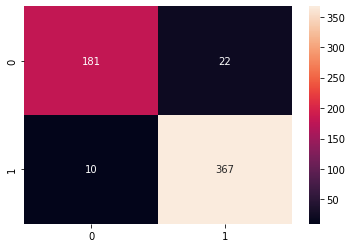

In [59]:
import seaborn as sns
cf_matrix=sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix,annot=True,fmt='g')

In [60]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       203
           1       0.94      0.97      0.96       377

    accuracy                           0.94       580
   macro avg       0.95      0.93      0.94       580
weighted avg       0.94      0.94      0.94       580



Applying SVM

In [61]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(train_review_tfidf,y_train)

SVC(kernel='linear')

In [62]:
nr=train_vectorizer.transform(X_test)
svclassifier.predict(nr)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [63]:
predicted=svclassifier.predict(nr)
p=pd.DataFrame(predicted)
actual=y_test

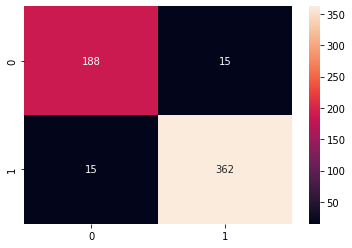

In [64]:
cf_matrix=sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix,annot=True,fmt='g')

In [65]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       203
           1       0.96      0.96      0.96       377

    accuracy                           0.95       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.95      0.95      0.95       580



In [66]:
print(df_review[df_review['Sentiment']==0].NewReview.shape)

(928,)


# Topic Modelling

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [69]:
corpus_bert=pd.DataFrame(df_review[df_review['Sentiment']==0].NewReview)
corpus_lda=pd.DataFrame(df_review[df_review['Sentiment']==0].NewReview)

In [70]:
corpus_bert=corpus_bert.reset_index()
corpus_lda=corpus_lda.reset_index()

In [71]:
print(corpus_bert.head())

   index  \
0      0   
1      1   
2      2   
3      3   
4      4   

                                                                                                                                     NewReview  
0                                                                                                                              tasteless pizza  
1                                                                                                                                   price high  
2                                   disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc  
3                                                                                                                               taste not mark  
4  open pizza box open jalapenos poppers seal tape not properly put no point blame poor delivery person highly disappoint not expect pizza hut  


In [72]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=7d99185a8bd6fffa64157f81a5cc6f2f14c66f7c4c6c292255ef5b2b9f51c3d1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [73]:
train_vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii')
tfidf_=train_vectorizer.fit_transform(corpus_lda.NewReview)


num_components=10
lda=LatentDirichletAllocation(n_components=num_components,max_iter=100)
lda_tfidf=lda.fit(tfidf_)

In [74]:
#pyLDAvis for tfidf 
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tfidf,tfidf_,train_vectorizer)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.230107  0.093292       1        1  38.445539
0     -0.168135 -0.106347       2        1  22.252194
6     -0.049156 -0.022268       3        1   8.186011
2      0.036165 -0.016309       4        1   6.009791
1      0.086515 -0.001166       5        1   5.545150
8      0.076236 -0.005396       6        1   4.756464
4      0.065998  0.009547       7        1   3.896073
7      0.065863  0.016593       8        1   3.833354
9      0.057582  0.014850       9        1   3.565194
5      0.059039  0.017205      10        1   3.510228, topic_info=         Term       Freq      Total Category  logprob  loglift
1572    pizza  51.000000  51.000000  Default  30.0000  30.0000
1419      not  35.000000  35.000000  Default  29.0000  29.0000
1476  oregano   5.000000   5.000000  Default  28.0000  28.0000
1402       no  23.000000  23.000000  Default  27.0000  27.0000
1954    small   7.000000   7.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
1713   reason   0.233970   1.232386  Topic10  -6.2240   1.6880
1294     melt   0.230556   1.558538  Topic10  -6.2387   1.4385
23        add   0.238447   3.956228  Topic10  -6.2051   0.5406
1159     late   0.237525   7.043068  Topic10  -6.2089  -0.0400
1923     show   0.219050   2.825737  Topic10  -6.2899   0.7923

[505 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3         2  0.870702      absolutely
23        1  0.505532             add
23        2  0.252766             add
26        7  0.590936         address
42        5  0.936915             ago
55        1  0.968135          almost
59        1  0.631469            also
59        2  0.270630            also
59        3  0.090210            also
68        1  0.936323        ambience
84        3  0.621092          answer
87        2  0.755177          anyone
97        6  0.874229             app
118       2  0.748703          arrive
124       1  0.981225             ask
146       1  0.698568       available
160       1  0.514611             bad
160       2  0.257305             bad
160       3  0.192979             bad
162       2  0.939935             bag
163       2  0.762774            bake
169       3  0.770560          barely
172       6  0.875967           basic
181       7  0.696945          become
208       1  0.921160            bill
211       1  0.986328            bite
215       2  0.661202             bkc
218       3  0.667318           blame
241       2  0.587921             box
241       3  0.195974             box
243       1  0.501876             boy
243       3  0.501876             boy
250       1  0.308294           bread
250       2  0.616589           bread
250       3  0.051382           bread
251       3  0.825132      breadstick
252       3  0.520987     breadsticks
255       3  1.033554           breed
273       1  0.333703            burn
273       2  0.667406            burn
274       2  1.029227           burst
283       1  0.237272            call
283       2  0.593179            call
283       3  0.118636            call
292       1  0.750029            card
322       1  0.917207          charge
334       1  0.446001          cheese
334       2  0.535202          cheese
348       1  0.809336         chicken
348       2  0.115619         chicken
351       4  0.892152           chill
352       4  0.898885          chilli
358       5  1.040336       chocolate
377       2  0.687848           close
390       1  0.513756            cold
390       2  0.280231            cold
390       3  0.186820            cold
395       1  0.831159            come
395       2  0.118737            come
405       3  0.918925    compensation
410       5  0.946463       complaint
414       1  0.227274      completely
414       2  0.454549      completely
414       3  0.227274      completely
450     

Using BERTopic

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
!pip install bertopic[visualization] --quiet

     |████████████████████████████████| 58 kB 2.9 MB/s 
     |████████████████████████████████| 5.2 MB 10.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 4.2 MB 32.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.5 MB/s 
     |████████████████████████████████| 84 kB 1.5 MB/s 
     |████████████████████████████████| 6.6 MB 30.9 MB/s 
     |████████████████████████████████| 636 kB 34.8 MB/s 
     |████████████████████████████████| 1.1 MB 33.2 MB/s 


In [77]:
from bertopic import BERTopic

In [78]:
corpus=list(corpus_bert.NewReview)
print(corpus[0:5])

['tasteless pizza', 'price high', 'disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc', 'taste not mark', 'open pizza box open jalapenos poppers seal tape not properly put no point blame poor delivery person highly disappoint not expect pizza hut']


In [79]:
bert_model=BERTopic(language="english")

In [80]:
topics,probs=bert_model.fit_transform(corpus)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [81]:
#Getting most frequent topics
bert_model.get_topic_freq()

,Topic,Count
0,-1,309
1,0,203
2,1,148
3,2,97
4,3,45
5,4,44
6,5,34
7,6,18
8,7,16
9,8,14


In [82]:
bert_model.get_topics()

{-1: [('pizza', 0.059290082810900445),
  ('not', 0.052500716357935816),
  ('order', 0.038899877299726875),
  ('hut', 0.03536353988183745),
  ('no', 0.03388064409673092),
  ('taste', 0.0319993644084914),
  ('food', 0.030937036163136915),
  ('bread', 0.028531958618023996),
  ('good', 0.027206274559361747),
  ('garlic', 0.0253145523822775)],
 0: [('service', 0.04345744466611784),
  ('pizza', 0.03910627476386887),
  ('order', 0.03579681689023626),
  ('staff', 0.030895234474265756),
  ('not', 0.030261445348792722),
  ('hut', 0.028642550488261136),
  ('place', 0.028274172702406453),
  ('outlet', 0.027431595870206136),
  ('serve', 0.027050835660064394),
  ('take', 0.02700310112163095)],
 1: [('cheese', 0.11456435328013036),
  ('pizza', 0.10337912704819095),
  ('worst', 0.04817413926781053),
  ('hut', 0.046327901930897954),
  ('order', 0.044667817086785126),
  ('taste', 0.04445605827053265),
  ('ever', 0.04326503914439599),
  ('not', 0.04244762033342971),
  ('no', 0.03937351798868846),
  ('dou

Visualization of topics

In [83]:
topic_list=[i for i in range(len(bert_model.get_topics())-1)]
print(topic_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [84]:
bert_model.visualize_barchart(topic_list, n_words=10, height=300)

If you want to see the complaints (reviews) wrt to the topic

In [85]:
df_tpc = pd.DataFrame({'topic': topics, 'document': corpus})

In [86]:
df_tpc[df_tpc['topic']==4].document

1                                                                                                                                                                                                                                                                          price high
2                                                                                                                                                                          disappoint order didnt mention small guy king fool us rs spend rs pizza issue acha grand deke kamaho bc mc
24                                                                                                                                                                        pay rs small size pizaa worth less dominos best compare pizaa hut anyway mistake order pizza hut last order
43                                                                                                                                                                    